CUSTOMER

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Checking for missing values
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encode categorical 'Gender' using Label Encoding
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

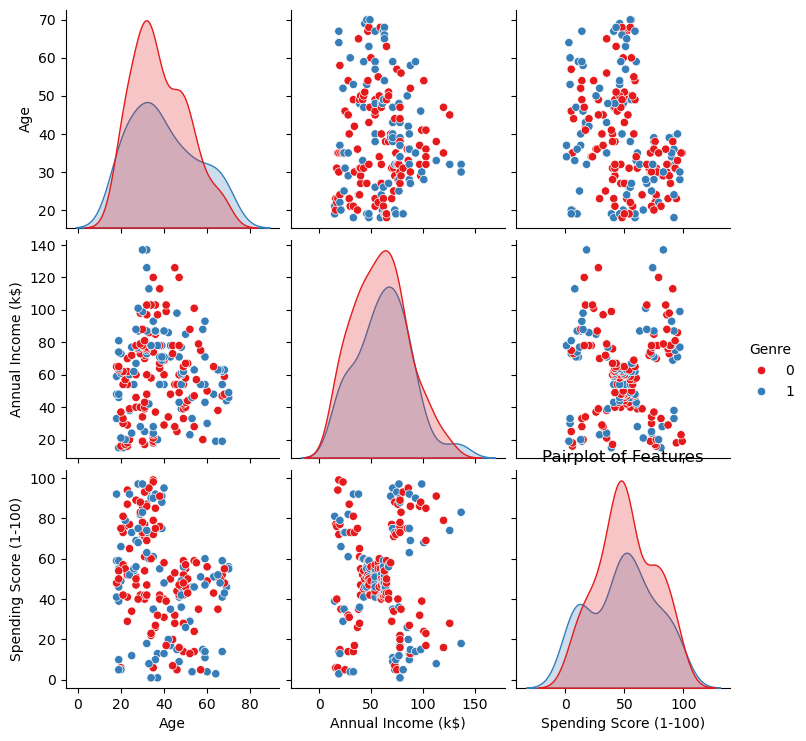

In [9]:
# Visualize dataset
# Pairplot
sns.pairplot(df, hue='Genre', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], palette='Set1')
plt.title('Pairplot of Features')
plt.show()

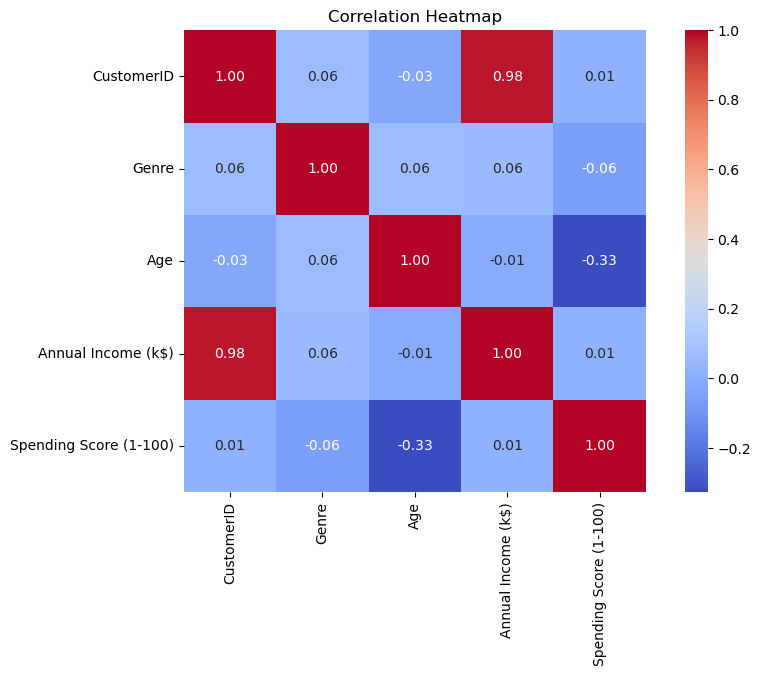

In [10]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

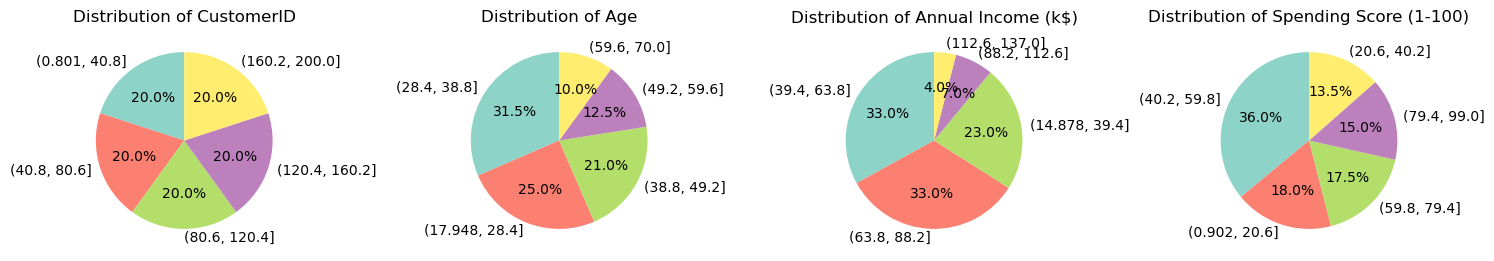

In [11]:
import matplotlib.pyplot as plt

# Function to create pie charts for binned numerical variables
def plot_pie_charts_for_numerical(data, bins=5):
    # Identify numerical columns
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    
    plt.figure(figsize=(15, 5))
    
    for i, column in enumerate(numerical_cols):
        # Create bins for the numerical column
        binned_data = pd.cut(data[column], bins=bins)
        plt.subplot(1, len(numerical_cols), i + 1)
        binned_data.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
        plt.title(f'Distribution of {column}')
        plt.ylabel('')  # Hide the y-label
    
    plt.tight_layout()
    plt.show()

# Call the function to plot pie charts for binned numerical columns
plot_pie_charts_for_numerical(df)


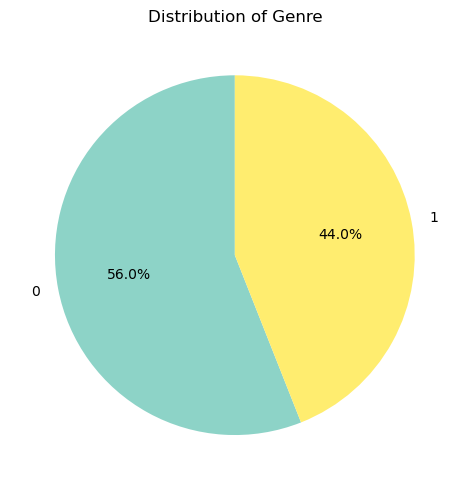

In [12]:
import matplotlib.pyplot as plt

# Function to create pie charts for encoded categorical variables
def plot_pie_charts(data, encoded_columns):
    plt.figure(figsize=(10, 5))
    
    for i, column in enumerate(encoded_columns):
        plt.subplot(1, len(encoded_columns), i + 1)
        data[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
        plt.title(f'Distribution of {column}')
        plt.ylabel('')  # Hide the y-label
    
    plt.tight_layout()
    plt.show()

# List of encoded categorical columns to visualize
encoded_columns = ['Genre']  # Add any other encoded columns here if available
plot_pie_charts(df, encoded_columns)


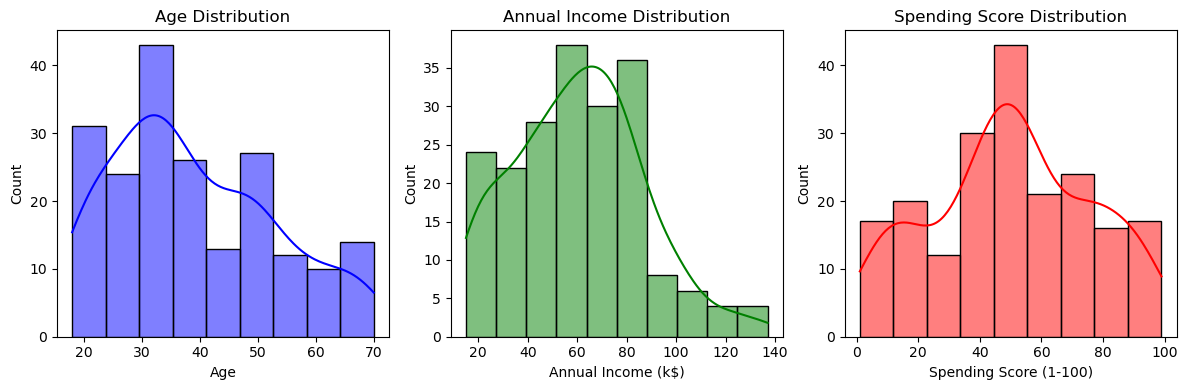

In [13]:
# Visualizing Age, Annual Income, and Spending Score distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='green')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

In [14]:
# Select features for clustering including encoded Gender
X = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Standard K-Means
kmeans = KMeans(n_clusters=6, init='random', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\vinamratha\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
# Greedy K-Means Class Definition
class GreedyKMeans:
    def __init__(self, n_clusters=5, max_iter=300, tol=1e-4, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        np.random.seed(self.random_state)

    def initialize_centroids(self, X):
        centroids = []
        centroids.append(X[np.random.choice(range(X.shape[0]))])
        for _ in range(1, self.n_clusters):
            distances = cdist(X, np.array(centroids), metric='euclidean')
            min_distances = np.min(distances, axis=1)
            next_centroid = X[np.argmax(min_distances)]
            centroids.append(next_centroid)
        return np.array(centroids)

    def assign_clusters(self, X, centroids):
        distances = cdist(X, centroids, metric='euclidean')
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = X[labels == k].mean(axis=0)
        return centroids

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iter):
            self.labels = self.assign_clusters(X, self.centroids)
            new_centroids = self.update_centroids(X, self.labels)
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids
        return self

    def predict(self, X):
        return self.assign_clusters(X, self.centroids)

# Optimized Greedy K-Means
greedy_kmeans = GreedyKMeans(n_clusters=6)
greedy_kmeans.fit(X_scaled)
y_greedy_kmeans = greedy_kmeans.predict(X_scaled)

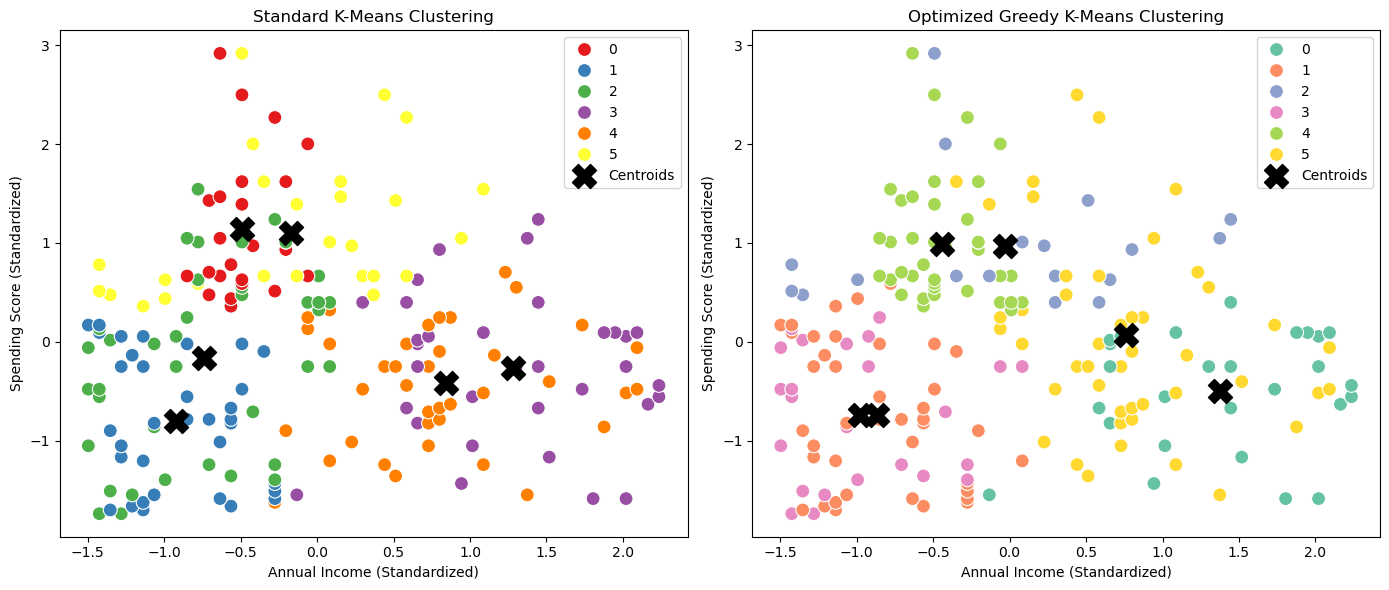

In [17]:
# Plotting Standard K-Means vs Greedy K-Means Clusters
plt.figure(figsize=(14, 6))

# Standard K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=y_kmeans, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='black', label='Centroids', marker='X')
plt.title('Standard K-Means Clustering')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend()

# Greedy K-Means Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=y_greedy_kmeans, palette='Set2', s=100)
plt.scatter(greedy_kmeans.centroids[:, 1], greedy_kmeans.centroids[:, 2], s=300, c='black', label='Centroids', marker='X')
plt.title('Optimized Greedy K-Means Clustering')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# Assign the cluster labels to the DataFrame
df['Standard_Cluster'] = y_kmeans
# Assign the greedy cluster labels to the DataFrame
df['Greedy_Cluster'] = y_greedy_kmeans
# Select only numeric columns for profiling
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Group by cluster and calculate the mean for numeric columns only
standard_cluster_summary = df.groupby('Standard_Cluster')[numeric_columns].mean()
greedy_cluster_summary = df.groupby('Greedy_Cluster')[numeric_columns].mean()

# Display summaries
print("Standard K-Means Cluster Summary:")
print(standard_cluster_summary)

print("\nGreedy K-Means Cluster Summary:")
print(greedy_cluster_summary)



Standard K-Means Cluster Summary:
                  CustomerID        Age  Annual Income (k$)  \
Standard_Cluster                                              
0                 167.250000  32.000000           90.375000   
1                  52.294118  26.000000           39.529412   
2                  93.589744  28.538462           56.307692   
3                  84.969697  56.727273           53.666667   
4                  74.512195  50.609756           49.658537   
5                 165.482759  36.482759           89.517241   

                  Spending Score (1-100)  Greedy_Cluster  
Standard_Cluster                                          
0                              82.041667        4.000000  
1                              59.500000        1.000000  
2                              69.128205        3.384615  
3                              35.878788        0.363636  
4                              40.146341        4.707317  
5                              18.000000        

In [19]:
# Calculate Silhouette Score for Standard K-Means
silhouette_score_standard = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score for Standard K-Means: {silhouette_score_standard:.4f}')

# Calculate Silhouette Score for Greedy K-Means
silhouette_score_greedy = silhouette_score(X_scaled, y_greedy_kmeans)
print(f'Silhouette Score for Optimized Greedy K-Means: {silhouette_score_greedy:.4f}')

# Determine which model performed better
if silhouette_score_greedy > silhouette_score_standard:
    print("Optimized Greedy K-Means performed better based on the Silhouette Score.")
else:
    print("Standard K-Means performed better based on the Silhouette Score.")


Silhouette Score for Standard K-Means: 0.3285
Silhouette Score for Optimized Greedy K-Means: 0.3299
Optimized Greedy K-Means performed better based on the Silhouette Score.


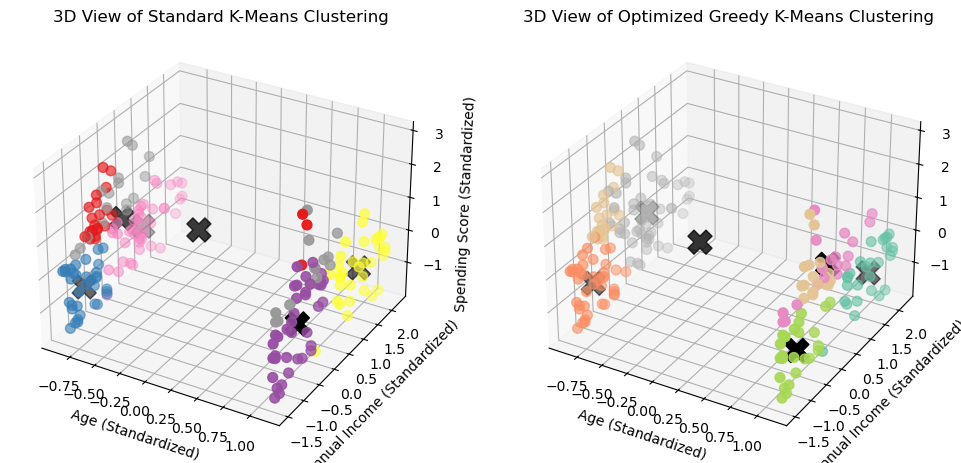

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Visualization for Standard K-Means
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_kmeans, s=50, cmap='Set1')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='black', label='Centroids', marker='X')
ax.set_title('3D View of Standard K-Means Clustering')
ax.set_xlabel('Age (Standardized)')
ax.set_ylabel('Annual Income (Standardized)')
ax.set_zlabel('Spending Score (Standardized)')

# 3D Visualization for Greedy K-Means
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_greedy_kmeans, s=50, cmap='Set2')
ax.scatter(greedy_kmeans.centroids[:, 0], greedy_kmeans.centroids[:, 1], greedy_kmeans.centroids[:, 2], s=300, c='black', label='Centroids', marker='X')
ax.set_title('3D View of Optimized Greedy K-Means Clustering')
ax.set_xlabel('Age (Standardized)')
ax.set_ylabel('Annual Income (Standardized)')
ax.set_zlabel('Spending Score (Standardized)')

plt.show()
